### Import packages.

In [1]:
# Data structures.
import pandas as pd

# Exploratory Data Analysis.
from src.eda import eda_utils

import warnings
warnings.filterwarnings('ignore')

### Read in data.

In [2]:
df_trn = pd.read_csv('../data/raw/train.csv')
df_tst = pd.read_csv('../data/raw/test.csv')

print('Number of trn samples: {}'.format(len(df_trn)))
print('Number of tst samples: {}'.format(len(df_tst)))

Number of trn samples: 891
Number of tst samples: 418


## 1. Exploratory Data Analysis
| *Variable*    | *Definition*          | *Key*                   | *Data Type* |
| -----------   | --------------------- | ----------------------- | ----------- |
| PassengerId   | Unique identifier     |                         | `int`       |
| Pclass        | Ticket class          | 1: 1st, 2:2nd, 3:3rd    | `int`       |
| Name          | Name                  |                         | `str`       |
| Sex           | Sex                   |                         | `str`       |
| Age           | Age in years          |                         | `float`     |
| SibSp         | # siblings / spouses  |                         | `int`       |
| Parch         | # parents / children  |                         | `int`       |
| Ticket        | Ticket number	        |                         | `int`       |
| Fare          | Passenger fare	    |                         | `float`     |
| Cabin         | Cabin number	        |                         | `str`       |
| Embarked      | Port of Embarkation   | C, Q, S: 3 unique ports | `str`       |
| Survived      | Survival              | 0 = No, 1 = Yes         | `bin`       |

In [3]:
df_trn.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_trn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
eda_utils.pandas_profile(df_trn,
                         title="Profiling Titanic Dataset",
                         output_file="../reports/profile_titanic.html")

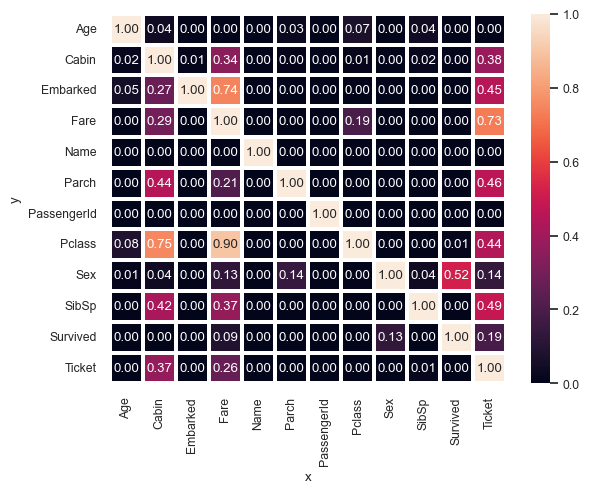

In [6]:
eda_utils.generate_pps(df_trn,
                       target="Survived")